In [4]:
import os
os.chdir('/Users/jorgegustavorodriguezaboytes/ASDA205/')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [93]:
#from github load this dataset
username = "datagus"
repository = "statstutorial2025"
directory = "week5/ring_count_22plus.csv"
github_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"
df = pd.read_csv(github_url)
pd.set_option('display.max_columns', None)

In [136]:
df

,ID,diam,rings,year,dummy_values,dummy_residuals,reg_values,reg_residuals
0,2_26_10_a,0.3,1,2022,3.0,-2.0,2.441973,-1.441973
1,3_26_10_a,0.5,2,2022,5.0,-3.0,3.375001,-1.375001
2,4_26_10_a,0.3,2,2022,3.0,-1.0,2.441973,-0.441973
3,5_26_10_a,0.4,1,2022,4.0,-3.0,2.908487,-1.908487
4,6_26_10_a,0.8,3,2022,8.0,-5.0,4.774542,-1.774542
...,...,...,...,...,...,...,...,...
806,2_27_11_b,0.6,4,2024,6.0,-2.0,3.841514,0.158486
807,1_27_11_b,1.1,12,2024,11.0,1.0,6.174083,5.825917
808,2_27_11_b,0.6,4,2024,6.0,-2.0,3.841514,0.158486
809,4_27_11_b,1.0,8,2024,10.0,-2.0,5.707569,2.292431


# Typical modeling

## Inspecting the data

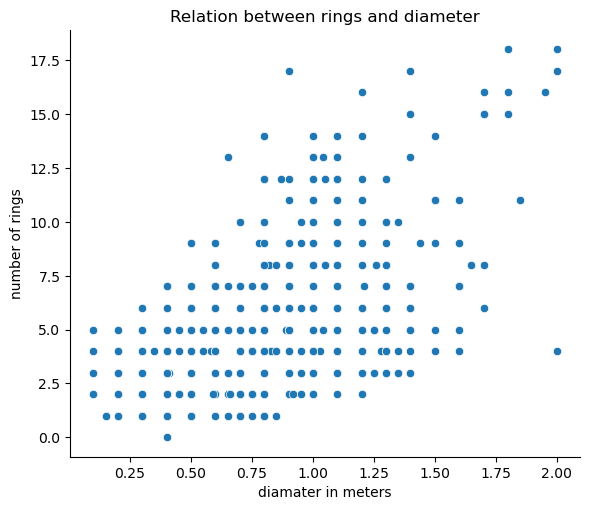

In [100]:
(
  sns.relplot(data=df,
              x="diam",
              y="rings",
              height=5,
              aspect=1.2)
  .set(title="Relation between rings and diameter")
  .set_axis_labels("diamater in meters","number of rings")
); #add a ; to remove the default printed format

## Creating dummy model

In [103]:
def dummy_model(diameter):
    return diameter * 10

### Running the dummy model

In [104]:
df["dummy_values"] = df["diam"].apply(dummy_model)

### Plotting dummy model

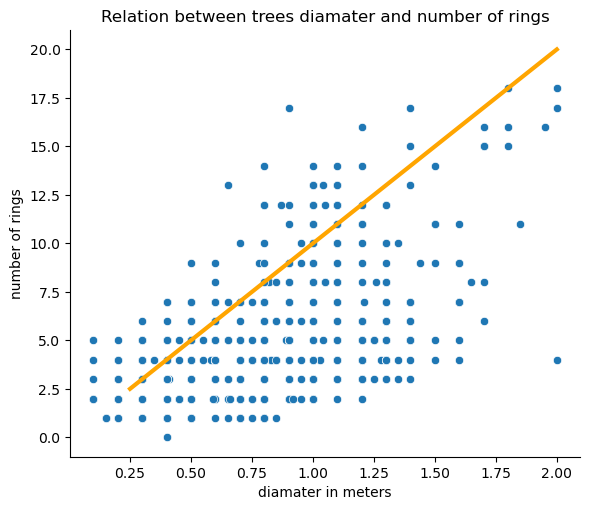

In [118]:
(
  sns.relplot(data=df,
              x="diam",
              y="rings",
              height=5,
              aspect=1.2)
  .set(title="Relation between trees diamater and number of rings")
  .set_axis_labels("diamater in meters","number of rings")
)

plt.plot([0.25, 2], [dummy_model(0.25), dummy_model(2)], color="orange", linewidth=3)
plt.show();

### Calculating dummy residuals

In [111]:
df["dummy_residuals"] = df["rings"] - df["dummy_values"]

## Running a simple regression model using statsmodel

### Running and checking summary

In [120]:
X = df["diam"]
X = sm.add_constant(X)
y = df["rings"]

model = sm.OLS(y, X).fit()

In [122]:
#whole summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rings   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     324.7
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           2.78e-61
Time:                        12:48:58   Log-Likelihood:                -1885.0
No. Observations:                 811   AIC:                             3774.
Df Residuals:                     809   BIC:                             3783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0424      0.230      4.537      0.000       0.591       1.493
diam           4.6651      0.259     18.018      0.000       4.157       5.173
==============================================================================
Omnibus:                      170.024   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              331.480
Skew:                           1.204   Prob(JB):                     1.05e-72
Kurtosis:                       5.002   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
#getting the parameters
model.params
intercept = model.params["const"]
slope = model.params["diam"]

### Running the model

In [124]:
def reg_model(emission):
    return emission*slope + intercept

In [125]:
df["reg_values"] = df["diam"].apply(reg_model)

### Plotting the regression model

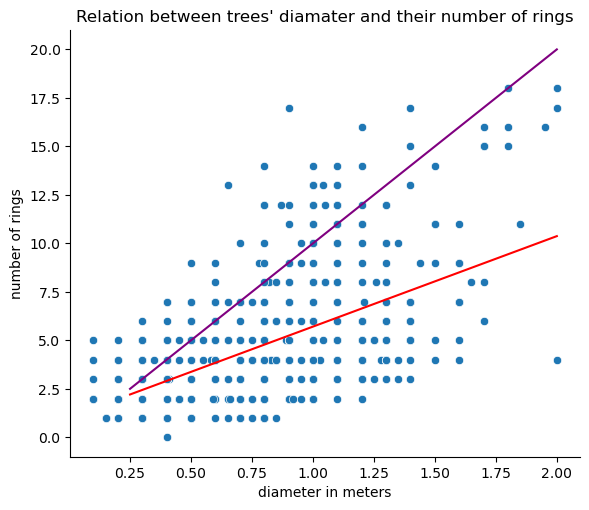

In [126]:
(
  sns.relplot(data=df,
              x="diam",
              y="rings",
              height=5,
              aspect=1.2)
  .set(title="Relation between trees' diamater and their number of rings")
  .set_axis_labels("diameter in meters","number of rings")
)

plt.plot([0.25, 2], [dummy_model(0.25), dummy_model(2)], color="purple")
plt.plot([0.25, 2], [reg_model(0.25), reg_model(2)], color="red")
plt.show();

### Calculating residuals

In [127]:
df["reg_residuals"] = df["rings"] - df["reg_values"]

In [ ]:
#alternatively you can simply use
#af_df["reg_values"] = model.predict(X)
#af_df["reg_residuals"] = model.resid

In [128]:
af_df.columns

Index(['total_emission', 'Average Temperature °C', 'dummy_values',
       'dummy_residuals', 'reg_values', 'reg_residuals'],
      dtype='object')

## Inspecting residuals

#### histogram of residuals

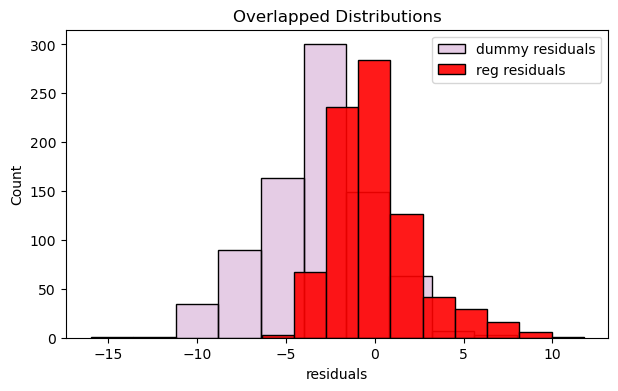

In [129]:
fig, ax = plt.subplots(figsize=(7,4))

sns.histplot(data=df, 
             x="dummy_residuals", 
             color="purple", 
             alpha=0.2, 
             bins=10, 
             label="dummy residuals",
             ax=ax)



sns.histplot(data=df, 
             x="reg_residuals", 
             color="red", 
             alpha=0.9, 
             bins=10,
             label="reg residuals",
             ax=ax)

ax.legend()
ax.set_xlabel("residuals")
ax.set_title("Overlapped Distributions")
plt.show()

#### residual vs value

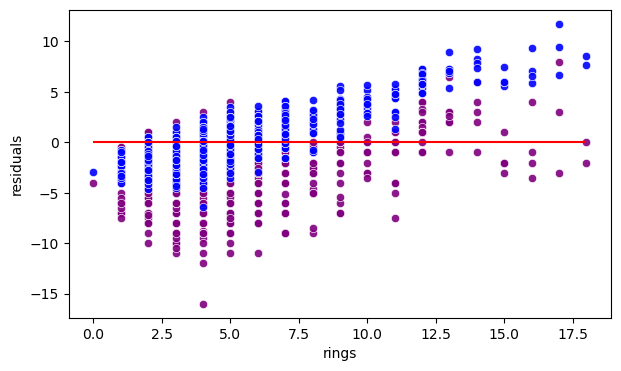

In [135]:
ig, ax = plt.subplots(figsize=(7,4))

sns.scatterplot(data=df,
             x="rings",
             y="dummy_residuals", 
             color="purple", 
             alpha=0.9, 
             ax=ax)

sns.scatterplot(data=df,
             x="rings",
             y="reg_residuals", 
             color="blue", 
             alpha=0.9, 
             ax=ax)
plt.hlines(y=0,
           xmin=min(df['rings']),
           xmax=max(df['rings']),
           color='red')
ax.set_ylabel("residuals")
plt.show()

# Sci-kit learn Pipeline

In [162]:
username = "datagus"
repository = "statstutorial2025"
directory = "week5/ring_count_22plus.csv"
github_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"
sdf = pd.read_csv(github_url)
pd.set_option('display.max_columns', None)

## Splitting the data

In [163]:
from sklearn.model_selection import train_test_split

y= sdf[["rings"]]
X = sdf[["diam"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Predicting with the dummy model

In [165]:
def dummy_model(diameter):
    return diameter * 10

In [166]:
dummy_y_test_pred = dummy_model(X_test)

## Assesing the model

### Mean Absolute Error (MAE)

**Mean Absolute Error (MAE)** tells us how far, on average, our predictions are from the real values.  
It takes the absolute difference between each prediction and the actual value and averages them — lower MAE means better predictions.

In [167]:
from sklearn.metrics import mean_absolute_error

dumb_mae = mean_absolute_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
float(round(dumb_mae,2))

3.71

### Root Mean Square Error (RMSE)
It takes the square root of the average squared differences between predicted and actual values — lower RMSE means better predictions.

In [157]:
from sklearn.metrics import root_mean_squared_error

dumb_rmse = root_mean_squared_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
float(round(dumb_rmse,2))

4.58

### Mean Absolute Percentage

**Mean Absolute Percentage Error (MAPE)** tells us the average size of prediction errors **as a percentage** of the real values.  
It measures how large the errors are compared to the true values — lower MAPE means more accurate, percentage-based predictions.

In [158]:
from sklearn.metrics import mean_absolute_percentage_error

dumb_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = dummy_y_test_pred)
float(dumb_mape)

110517782266761.67

### Rsquared

**R²(Coefficient of Determination)** shows how much of the variation in the target variable is explained by the model.  
Values closer to 1 mean the model fits the data better, while values near 0 mean it explains very little.

In [159]:
from sklearn.metrics import r2_score

dumb_r2 = r2_score(y_true = y_test,
                   y_pred = dummy_y_test_pred)

float(dumb_r2)

-1.0248469617349896

## Now with the linear regresision model

In [168]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [[4.54591329]]


### Assessing the models

In [178]:
mae = mean_absolute_error(y_true = y_test,
                               y_pred = y_pred)


rmse = root_mean_squared_error(y_true = y_test,
                               y_pred = y_pred)

mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = y_pred)

r2 = r2_score(y_true = y_test,
                   y_pred = y_pred)


dummy_metrics_list = [dumb_mae, dumb_rmse, dumb_mape, dumb_r2]

reg_metrics_list = [mae, rmse, mape, r2]

evals = {"evaluation": ["mae", "rmse", "mape", "r2"],
        "metrics_dummy": dummy_metrics_list,
        "metrics_regmodel": reg_metrics_list}
evals_df = pd.DataFrame(evals)
evals_df = evals_df.round(2)

In [200]:
pd.set_option('display.float_format', '{:.2f}'.format)
evals_df

,evaluation,metrics_dummy,metrics_regmodel,metrics_randomforest
0,mae,3.71,1.95,1.83
1,rmse,4.58,2.63,2.52
2,mape,110517782266761.69,80828652114024.14,85410786428917.52
3,r2,-1.02,0.33,0.39


### let's try another model - RandomForest

In [198]:
from sklearn.ensemble import RandomForestRegressor

y= sdf["rings"]
X = sdf[["diam"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rforest = RandomForestRegressor()

rforest.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = rforest.predict(X_test)

In [203]:
#running the evaluation metrics

rf_mae = mean_absolute_error(y_true = y_test,
                               y_pred = y_pred)


rf_rmse = root_mean_squared_error(y_true = y_test,
                               y_pred = y_pred)

rf_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = y_pred)

rf_r2 = r2_score(y_true = y_test,
                   y_pred = y_pred)

rf_metrics_list = [rf_mae, rf_rmse, rf_mape, rf_r2]

evals_df["metrics_randomforest"] = rf_metrics_list

In [ ]:
evals_df

# Exercise

Imagine you were hired as a data scientist for a environmental organization. Your job is to provide a model that predicts the change of average temperature given the CO2 emissions.